### Imports

In [141]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings("ignore")


### Display pandas tables side by side

In [142]:
from IPython.display import display, HTML

CSS = """
.output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(CSS))

### Data import, exploration and preparation

In [143]:
df = pd.read_csv('TOTALSA.csv',index_col='DATE',parse_dates=True)
display(df.head())
display(df.tail())
display(df.describe())
if adfuller(df.TOTALSA)[1] < .05:
    print("P value: ",adfuller(df.TOTALSA)[1], "<5%")
else:
    print("P value: ",adfuller(df.TOTALSA)[1], ">5%")

,TOTALSA
DATE,
1976-01-01,12.814
1976-02-01,13.340
1976-03-01,13.378
1976-04-01,13.223
1976-05-01,12.962


,TOTALSA
DATE,
2019-12-01,17.120
2020-01-01,17.364
2020-02-01,17.203
2020-03-01,11.742
2020-04-01,8.841


,TOTALSA
count,532.000000
mean,15.135288
std,2.295862
min,8.841000
25%,13.691750
50%,15.406000
75%,16.977500
max,22.055000


P value:  0.18735964389135845 >5%


### Differencing and checking adfuller again

In [144]:
df1 = df.copy()
df1['data'] = df.TOTALSA.diff(1)
df1 = df1.iloc[1:]
if adfuller(df1.data)[1] < .05:
    print("P value: ",adfuller(df1.data)[1], "<5%")
else:
    print("P value: ",adfuller(df1.data)[1], ">5%")

P value:  1.1982516562960213e-27 <5%


In [145]:
fst_decade, fst_decade_test = df1.loc['19900101':'19981231'], df1.loc['19990101':'19991231']
display(fst_decade.head())
display(fst_decade.tail())
display(fst_decade_test.head())
display(fst_decade_test.tail())
snd_decade, snd_decade_test = df1.loc['20100101':'20181231'], df1.loc['20190101':'20191231']

,TOTALSA,data
DATE,,
1990-01-01,16.308,2.758
1990-02-01,14.363,-1.945
1990-03-01,14.486,0.123
1990-04-01,14.281,-0.205
1990-05-01,14.022,-0.259


,TOTALSA,data
DATE,,
1998-08-01,14.796,0.128
1998-09-01,16.313,1.517
1998-10-01,17.131,0.818
1998-11-01,16.118,-1.013
1998-12-01,17.409,1.291


,TOTALSA,data
DATE,,
1999-01-01,16.593,-0.816
1999-02-01,17.097,0.504
1999-03-01,16.832,-0.265
1999-04-01,16.929,0.097
1999-05-01,17.564,0.635


,TOTALSA,data
DATE,,
1999-08-01,17.641,-0.047
1999-09-01,17.662,0.021
1999-10-01,17.684,0.022
1999-11-01,17.620,-0.064
1999-12-01,18.322,0.702


### Fitting SARIMA model:

In [146]:
fst_auto_order=auto_arima(fst_decade.data
                       , max_order=10
                       , d=1, D=1, m=12
                       , max_p=5, max_q=5, max_P=5, max_Q=5
                       , stepwise=True
                       , suppress_warnings=True
                      )
snd_auto_order=auto_arima(snd_decade.data
                       , max_order=10
                       , d=1, D=1, m=12
                       , max_p=5, max_q=5, max_P=5, max_Q=5
                       , stepwise=True
                       , suppress_warnings=True
                      )
fst_auto_order, snd_auto_order

(ARIMA(maxiter=50, method='lbfgs', order=(0, 1, 2), out_of_sample_size=0,
       scoring='mse', scoring_args=None, seasonal_order=(1, 1, 1, 12),
       start_params=None, suppress_warnings=True, trend=None,
       with_intercept=True),
 ARIMA(maxiter=50, method='lbfgs', order=(2, 1, 2), out_of_sample_size=0,
       scoring='mse', scoring_args=None, seasonal_order=(2, 1, 2, 12),
       start_params=None, suppress_warnings=True, trend=None,
       with_intercept=True))

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                 data   No. Observations:                  108
Model:             SARIMAX(0, 1, 2)x(1, 1, [1], 12)   Log Likelihood                -106.885
Date:                              Wed, 03 Jun 2020   AIC                            223.769
Time:                                      00:48:20   BIC                            236.539
Sample:                                  01-01-1990   HQIC                           228.929
                                       - 12-01-1998                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.7169      0.071    -24.193      0.000      -1.856      -1.578
ma.L2          0.7684      0.070     10.902      0.000       0.630       0.907
ar.S.L12      -0.2633      0.163     -1.619      0.106      -0.582       0.056
ma.S.L12      -0.6737      0.157     -4.297      0.000      -0.981      -0.366
sigma2         0.4691      0.081      5.820      0.000       0.311       0.627
===================================================================================
Ljung-Box (Q):                       37.78   Jarque-Bera (JB):                 1.05
Prob(Q):                              0.57   Prob(JB):                         0.59
Heteroskedasticity (H):               0.99   Skew:                             0.24
Prob(H) (two-sided):                  0.98   Kurtosis:                         3.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

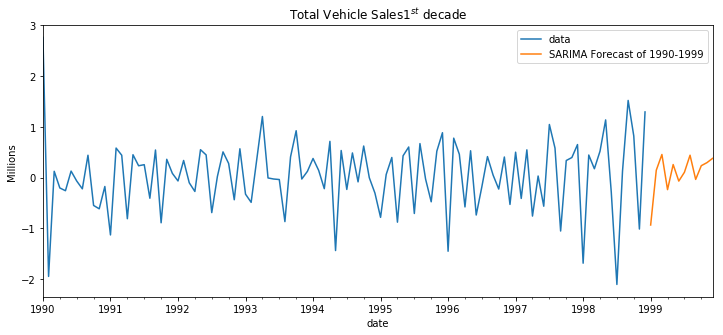

In [147]:
fst_model=SARIMAX(fst_decade.data, order=(0,1,2), seasonal_order=(1,1,1,12))
fst_results=fst_model.fit()
display(fst_results.summary())
fst_fcast=fst_results.predict(len(fst_decade), len(fst_decade)+11).rename('SARIMA Forecast of 1990-1999')
title="Total Vehicle Sales"
ylabel="Millions"
xlabel="date"
ax = fst_decade.data.plot(legend=True, figsize=(12,5), title=title+"1$^{st}$ decade")
fst_fcast.plot(legend=True)
ax.autoscale(axis='x', tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

Making sure the date ranges are matching:
Range of forecast:
1999-01-01   -0.933956
Freq: MS, Name: SARIMA Forecast of 1990-1999, dtype: float64
1999-12-01    0.376915
Freq: MS, Name: SARIMA Forecast of 1990-1999, dtype: float64
Range of test
DATE
1999-01-01   -0.816
Name: data, dtype: float64
DATE
1999-12-01    0.702
Name: data, dtype: float64


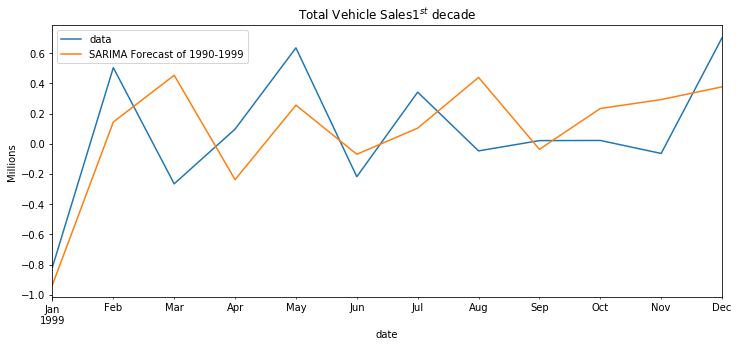

In [148]:
ax = fst_decade_test.data.plot(legend=True, figsize=(12,5), title=title+"1$^{st}$ decade")
fst_fcast.plot(legend=True)
ax.autoscale(axis='x', tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);
print("Making sure the date ranges are matching:")
print("Range of forecast:")
print(fst_fcast.head(1))
print(fst_fcast.tail(1))
print("Range of test")
print(fst_decade_test.data.head(1))
print(fst_decade_test.data.tail(1))

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                               data   No. Observations:                  108
Model:             SARIMAX(2, 1, 2)x(2, 1, 2, 12)   Log Likelihood                 -53.054
Date:                            Wed, 03 Jun 2020   AIC                            124.107
Time:                                    00:48:25   BIC                            147.092
Sample:                                01-01-2010   HQIC                           133.395
                                     - 12-01-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1793      0.132     -8.920      0.000      -1.438      -0.920
ar.L2         -0.3394      0.131     -2.584      0.010      -0.597      -0.082
ma.L1         -0.0084     12.731     -0.001      0.999     -24.961      24.944
ma.L2         -0.9907     12.869     -0.077      0.939     -26.213      24.231
ar.S.L12       0.6567      0.348      1.888      0.059      -0.025       1.339
ar.S.L24      -0.5594      0.195     -2.863      0.004      -0.942      -0.176
ma.S.L12      -1.3549      0.359     -3.777      0.000      -2.058      -0.652
ma.S.L24       0.5317      0.548      0.970      0.332      -0.543       1.606
sigma2         0.1217      1.572      0.077      0.938      -2.959       3.203
===================================================================================
Ljung-Box (Q):                       26.46   Jarque-Bera (JB):                15.35
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                            -0.69
Prob(H) (two-sided):                  0.67   Kurtosis:                         4.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

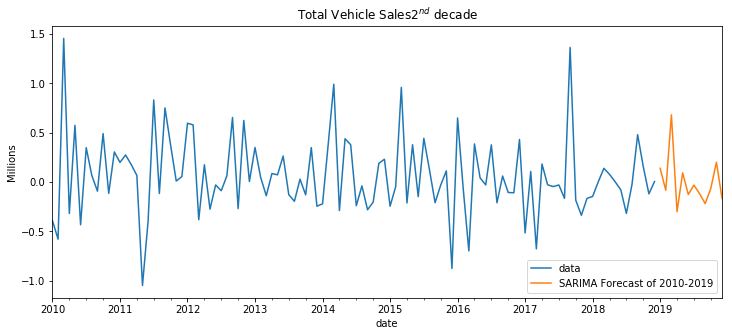

In [149]:
snd_model=SARIMAX(snd_decade.data, order=(2,1,2), seasonal_order=(2,1,2,12))
snd_results=snd_model.fit()
display(snd_results.summary())
snd_fcast=snd_results.predict(len(snd_decade), len(snd_decade)+11).rename('SARIMA Forecast of 2010-2019')
ax = snd_decade.data.plot(legend=True, figsize=(12,5), title=title+"2$^{nd}$ decade")
snd_fcast.plot(legend=True)
ax.autoscale(axis='x', tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

Making sure the date ranges are matching:
Range of forecast:
2019-01-01    0.140217
Freq: MS, Name: SARIMA Forecast of 2010-2019, dtype: float64
2019-12-01   -0.164903
Freq: MS, Name: SARIMA Forecast of 2010-2019, dtype: float64
Range of test
DATE
2019-01-01   -0.648
Name: data, dtype: float64
DATE
2019-12-01   -0.327
Name: data, dtype: float64


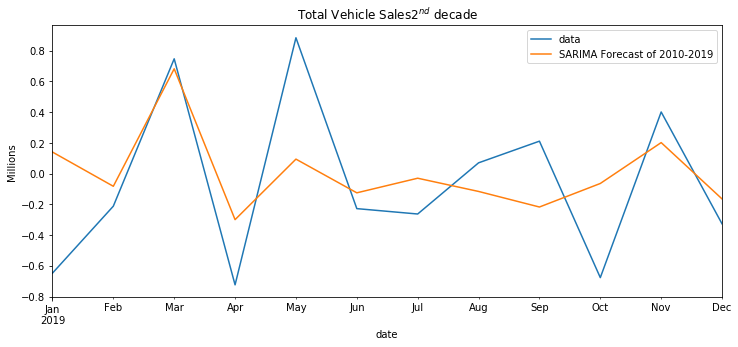

In [150]:
ax = snd_decade_test.data.plot(legend=True, figsize=(12,5), title=title+"2$^{nd}$ decade")
snd_fcast.plot(legend=True)
ax.autoscale(axis='x', tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);
print("Making sure the date ranges are matching:")
print("Range of forecast:")
print(snd_fcast.head(1))
print(snd_fcast.tail(1))
print("Range of test")
print(snd_decade_test.data.head(1))
print(snd_decade_test.data.tail(1))

### Assessing the quality of each forecast:

In [151]:
from statsmodels.tools.eval_measures import rmse
#print(np.sqrt(fst_results.mse), np.sqrt(snd_results.mse))
#print(rmse(fst_fcast, fst_decade_test.data), rmse(snd_fcast, snd_decade_test.data))
pd.DataFrame({"Decade": [1, 2], "RMSE of training": [np.sqrt(fst_results.mse), np.sqrt(snd_results.mse)], "RMSE of test":[rmse(fst_fcast, fst_decade_test.data), rmse(snd_fcast, snd_decade_test.data)]}).style.hide_index()

Decade,RMSE of training,RMSE of test
1,1.09253,0.354993
2,0.535938,0.425309


### This is not a good model. Let's look for other seasonalities

In [152]:
from scipy.fft import fft
df2 = df.copy()
df2.rename(inplace=True, columns={"TOTALSA":"data"})
fst_decade_b, fst_decade_test_b = df2.loc['19900101':'19981231'], df2.loc['19990101':'19991231']
snd_decade_b, snd_decade_test_b = df2.loc['20100101':'20181231'], df2.loc['20190101':'20191231']

First, let's take a look at a fft

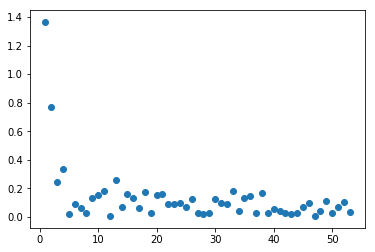

In [153]:
N = len(fst_decade_b.data)
yf = fft(fst_decade_b.data)
xf = range(0, N//2)
plt.scatter(xf[1:], (2.0/N * np.abs(yf[0:N//2]))[1:]);
rankd = dict(zip(2.0/N * np.abs(yf[0:N//2]), xf))
rankl = list(rankd.items())
rankl.sort(reverse=True, key=lambda x: x[0])

In [154]:
print(rankl)
periods = [x[1] for x in rankl]

[(29.19922222222222, 0), (1.3636548368073977, 1), (0.7708785705969412, 2), (0.3354628024883703, 4), (0.25847248043192383, 13), (0.24468337211271252, 3), (0.18174284879648372, 11), (0.18093309531524918, 33), (0.17240216704451777, 18), (0.17054625512937813, 38), (0.16390705088304616, 21), (0.15755646433599726, 15), (0.15687325145699899, 10), (0.1516442140733203, 20), (0.14952252194201898, 36), (0.13583353159698291, 9), (0.1353896163056512, 16), (0.13039927653734323, 35), (0.12820424389441298, 30), (0.12331693889795248, 26), (0.10865041453876871, 49), (0.10201594579171384, 52), (0.10127532432923864, 46), (0.09839471481179629, 24), (0.09451507786307443, 31), (0.09274889706175408, 32), (0.09123293467946021, 6), (0.09044093260913527, 23), (0.08925598009030414, 22), (0.07046014231751636, 25), (0.07020218068465044, 51), (0.06897734347939123, 14), (0.06726056436210215, 45), (0.06419809805871485, 17), (0.06073640966651841, 7), (0.05251442787849713, 40), (0.044668605412016504, 48), (0.04250417926

Worth noting there are a couple of frequencies more important than 12 months. This can be caused by the fact that car leases have different durations. Also worth noting, that average duration of ownage of a new car is 79mo, and a used one - 66mo (according to [IHS Markit](https://news.ihsmarkit.com/prviewer/release_only/slug/automotive-vehicles-getting-older-average-age-light-cars-and-trucks-us-rises-again-201)) - so it's quite possible that 12 months is not the main seasonality. Let's try with 5 highest frequencies. The data above is for years 1990-2000 - we'll later see if the things back then were really "built to last"

In [155]:
fst_est = TBATS(seasonal_periods=periods[2:9])
fst_model = fst_est.fit(fst_decade_b.data)

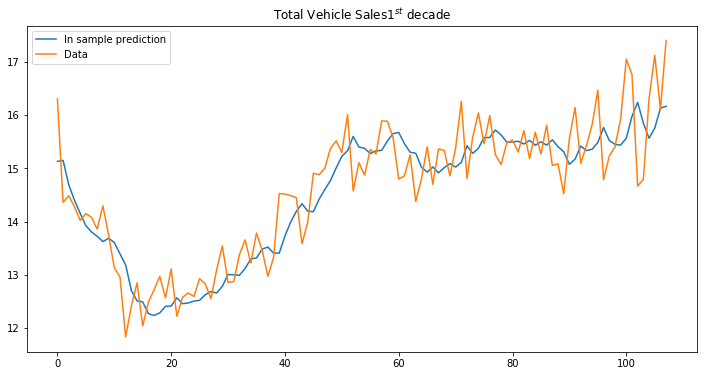

In [156]:
plt.figure(figsize=(12,6))
plt.plot(fst_model.y_hat, label="In sample prediction")
plt.plot(list(fst_decade_b.data), label="Data")
plt.legend()
plt.title(title+"1$^{st}$ decade");

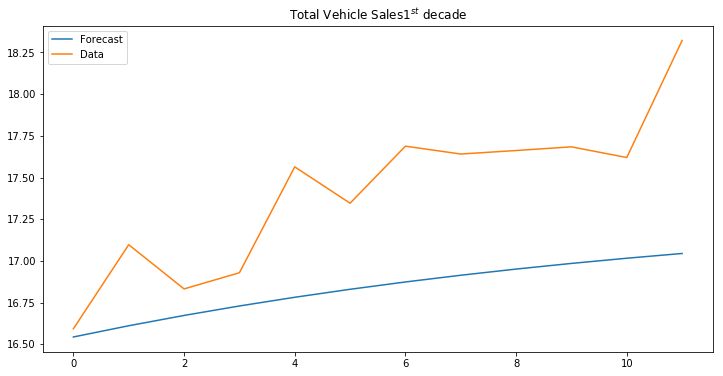

In [157]:
fst_fcst_b = fst_model.forecast(steps=12)
plt.figure(figsize=(12,6))
plt.plot(fst_fcst_b, label="Forecast")
plt.plot(list(fst_decade_test_b.data), label="Data")
plt.legend()
plt.title(title+"1$^{st}$ decade");

That's disappointing, given it devoured 2 mins of my 16 cores working 100%. Let's repeat for 2<sup>nd</sup> decade and do the measurements

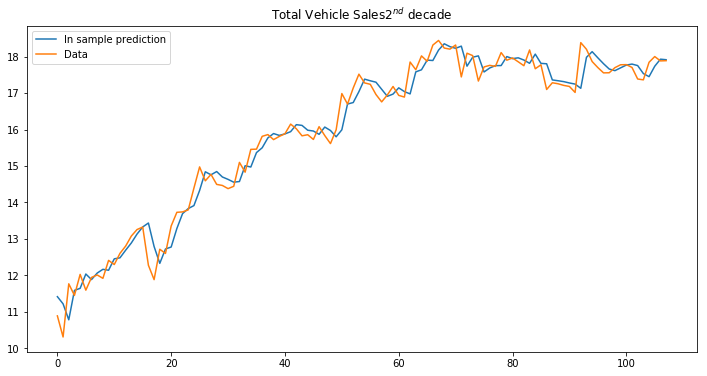

In [158]:
N = len(snd_decade_b.data)
yf = fft(snd_decade_b.data)
xf = range(0, N//2)
rankd = dict(zip(2.0/N * np.abs(yf[0:N//2]), xf))
rankl = list(rankd.items())
rankl.sort(reverse=True, key=lambda x: x[0])
periods = [x[1] for x in rankl]
snd_est = TBATS(seasonal_periods=periods[2:9])
snd_model = snd_est.fit(snd_decade_b.data)
plt.figure(figsize=(12,6))
plt.plot(snd_model.y_hat, label="In sample prediction")
plt.plot(list(snd_decade_b.data), label="Data")
plt.legend()
plt.title(title+"2$^{nd}$ decade");

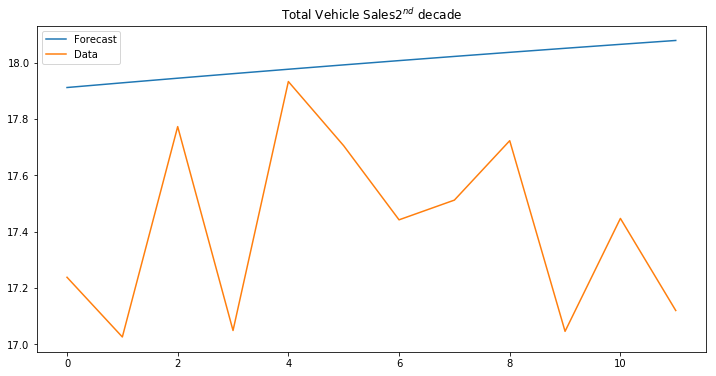

In [159]:
snd_fcst_b = snd_model.forecast(steps=12)
plt.figure(figsize=(12,6))
plt.plot(snd_fcst_b, label="Forecast")
plt.plot(list(snd_decade_test_b.data), label="Data")
plt.legend()
plt.title(title+"2$^{nd}$ decade");

### Comparison



In [176]:
from statsmodels.tools.eval_measures import rmse
#print(np.sqrt(fst_results.mse), np.sqrt(snd_results.mse))
#print(rmse(fst_fcast, fst_decade_test.data), rmse(snd_fcast, snd_decade_test.data))
pd.DataFrame({
    "Tool":["SARIMA", "", "TBATS", ""]
    ,"Decade": [1, 2, 1, 2]
    , "RMSE of training": [np.sqrt(fst_results.mse)
                           , np.sqrt(snd_results.mse)
                           , rmse(fst_model.y_hat,fst_decade_b.data)
                           , rmse(snd_model.y_hat,snd_decade_b.data)                          
                          ]
    , "RMSE of test":[rmse(fst_fcast, fst_decade_test.data)
                      , rmse(snd_fcast, snd_decade_test.data)
                      , rmse(fst_fcst_b, fst_decade_test_b.data)
                      , rmse(snd_fcst_b, snd_decade_test_b.data)
                     ]
}).style.hide_index()

Tool,Decade,RMSE of training,RMSE of test
SARIMA,1,1.09253,0.354993
,2,0.535938,0.425309
TBATS,1,0.583999,0.66861
,2,0.375391,0.658557


TBATS is even worse, although it's worth noting that it fits the data better. But then again - so does a copy. \
I don't think I'm going to win the competition. As a bonus: a promised frequency check to see if the cars really were built to last:

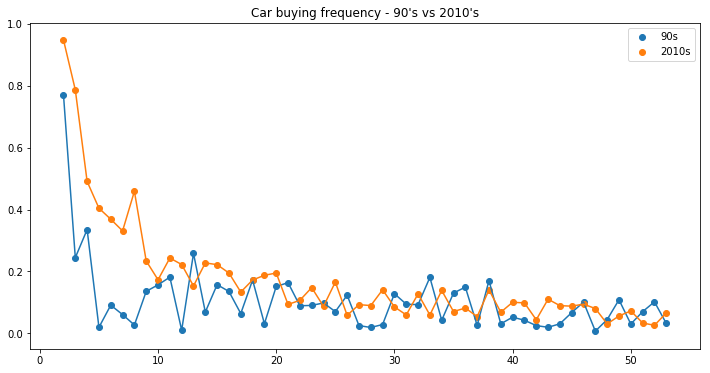

In [193]:
N = len(fst_decade_b.data)
fst = fft(fst_decade_b.data)
snd = fft(snd_decade_b.data)
xf = range(0, N//2)

plt.figure(figsize=(12,6))
plt.title("Car buying frequency - 90's vs 2010's")
#ax1=plt.subplot(211)
plt.scatter(xf[2:], (2.0/N * np.abs(fst[0:N//2]))[2:], label="90s")
plt.plot(xf[2:], (2.0/N * np.abs(fst[0:N//2]))[2:])
#ax2=plt.subplot(212 ,sharex=ax1)
plt.scatter(xf[2:], (2.0/N * np.abs(snd[0:N//2]))[2:], label="2010s")
plt.plot(xf[2:], (2.0/N * np.abs(snd[0:N//2]))[2:])
plt.legend();

The low frequencies are far more apparent for new cars, but later it seems to loose importance. Are the cars breaking faster, or are we just buying more of them?